# THE SPARKS FOUNDATION


<h2>TASK-1  Predict the percentage of marks of a student based on the no. of study hours using Supervised Machine Learning.</h2>

<h2>Author- Sagar Gulati<h2>

GRIPNov21

In [1]:
#importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset

url = "http://bit.ly/w-data"
dataset= pd.read_csv(url)
dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Exploring the dataset

In [3]:
dataset.shape
dataset.describe

<bound method NDFrame.describe of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
dataset.dtypes

Hours     float64
Scores      int64
dtype: object

In [6]:
dataset.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
dataset.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


<h2>From this we come to know that feature hours is of float type and feature Scores is of int type.</h2>

In [8]:
#Checking the total null values

dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Data Visualisation

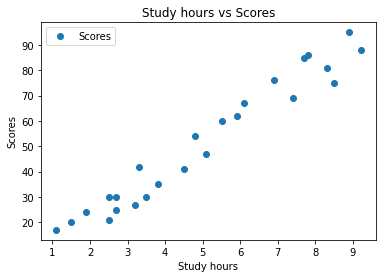

In [9]:
dataset.plot(x="Hours",y="Scores",style="o")
plt.title("Study hours vs Scores")
plt.xlabel("Study hours")
plt.ylabel("Scores")
plt.show()

In [10]:
# Finding the correlation

dataset.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


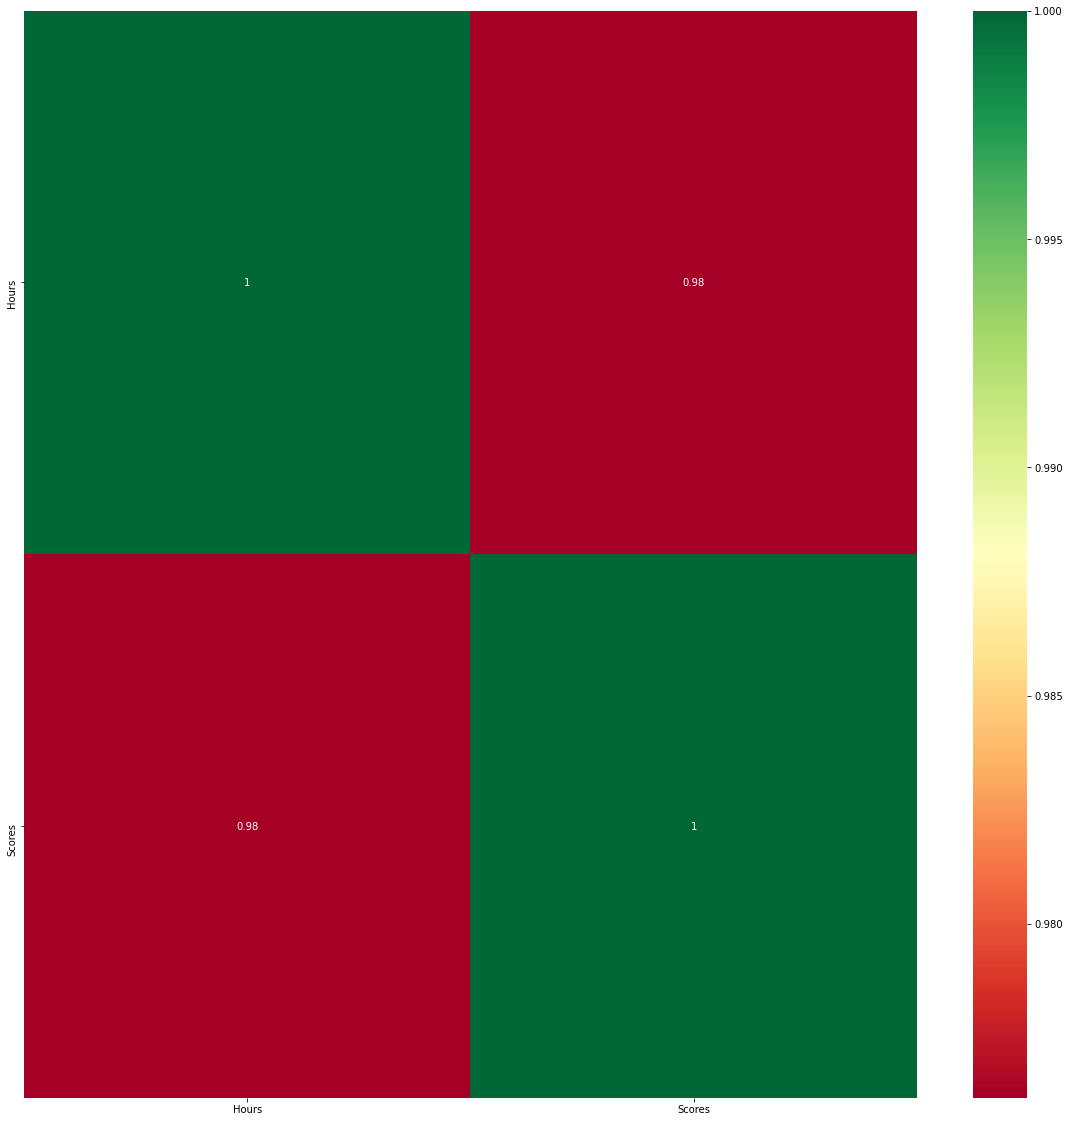

In [11]:
# Visualising the correlation of dependent and independent feature
corr_mat=dataset.corr()
features=corr_mat.index
plt.figure(figsize=(20,20))

g=sns.heatmap(dataset[features].corr(),annot=True,cmap="RdYlGn")

# **Preparing the data**

The next step is to divide the data into "independent varianle" (inputs) and "dependent variable" (outputs).

In [12]:
#Splitting of the dataset

In [20]:
#Independent feature
x=dataset.iloc[:,:-1].values
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [19]:
#Dependent feature
y=dataset.iloc[:,1].values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [22]:
print("X Shape {}".format(x.shape))
print("Y Shape {}".format(y.shape))

X Shape (25, 1)
Y Shape (25,)


# Splitting dataset into Training and testing dataset

In [26]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Building the model

In [30]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()
regressor.fit(X_train,y_train)

print("The model is trained successfully using the training data")

The model is trained successfully using the training data


# Plotting the best fit line for regression

In [36]:
line=regressor.coef_ * x + regressor.intercept_   #This is the equation of a line Y=mx+c where m is the slope of line

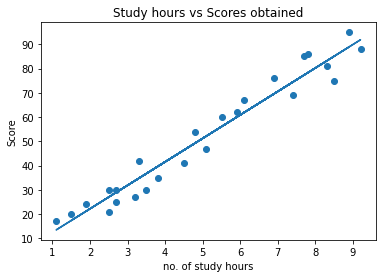

In [40]:
plt.scatter(x,y)
plt.xlabel("no. of study hours")
plt.ylabel("Score")
plt.title("Study hours vs Scores obtained")
plt.plot(x,line)
plt.show()

# Making predictions using test dataset

In [42]:
print(X_test)

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [44]:
y_pred=regressor.predict(X_test)
y_pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [46]:
df=pd.DataFrame({'Actual':y_test,"Predict":y_pred})
df

,Actual,Predict
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


# Distplot of actual and predicted value

C:\Users\SAGAR\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

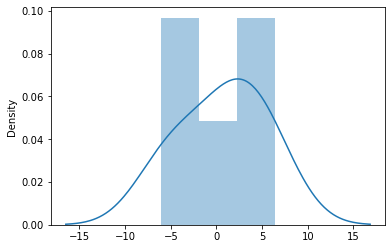

In [47]:
sns.distplot(y_test-y_pred)

# Model Evaluation

In [48]:
from sklearn import metrics
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 3.9207511902099244


# Predictign the scores when the student studies for 9.25 hours

In [51]:
hours=9.25
test=np.array([hours])
test=test.reshape(-1,1)
own_predict=regressor.predict(test)
print("no of hours studied {}".format(hours))
print("Predicted Score {}".format(own_predict[0]) )

no of hours studied 9.25
Predicted Score 92.38611528261494


# Result:
 <h2>If a student studies for 9.25 hours a day then he can score 92.386 %